## 1. Business Understanding

![Honey Bardger](Tesla.jpg)

#### **1.1 Business Overview**
Tesla, Inc. is an American multinational automotive and clean energy company headquartered in Austin, Texas.Tesla is a leading company in the electric vehicle revolution and has been instrumental in making EVs more popular and accessible.

#### **1.2 Problem statement**
Tesla, Inc., as a pioneering force in the electric vehicle industry, has experienced significant fluctuations in its stock performance. Investors are keen to understand the potential return on investment (ROI) to make informed decisions. The challenge is to predict the return on investment by analyzing the stock's historical performance, identifying trends, understanding volatility, and uncovering relationships between various price points. This predictive model aims to provide accurate and actionable insights to support strategic investment decisions.This data will be useful to investors and financial analysts.


#### **1.3 Objectives**
To understand the stock's performance over time by examining daily data points, including the opening price, high price, low price, closing price, trading volume, and adjusted closing price.

**specific objectives**

1. Analyze historical stock market data to gain actionable insights into the stock's performance.
2. Identify trends and patterns in the stock's daily price movements and trading volume.
3. Evaluate key metrics such as opening price, high price, low price, closing price, trading volume, and adjusted closing price.
4. Support informed investment decisions by providing accurate and relevant data analysis.
5. Determine correlations between different price points and trading volume.

#### **1.4 Success Criteria**
Success will be measured by the accuracy of the insights and the practical applicability of the analysis in supporting strategic investment choices.


Source: https://www.kaggle.com/rpaguirre/tesla-stock-price

## 2. Data Understanding
The date - "Date"

The opening price of the stock - "Open"

The high price of that day - "High"

The low price of that day - "Low"

The closed price of that day - "Close"

The amount of stocks traded during that day - "Volume"

The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"


### Data Loading
Import the necessary modules and packages:

In [1]:
# import libraries
import pandas as pd

Next is to loads the Tesla dataset, displays the first few rows to get an initial view of the data.

In [2]:
# load data
Tesla = pd.read_csv('Tesla Dataset.csv')
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,6/30/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


The Tesla dataset preview shows stock prices with columns for Date, Open, High, Low, Close, Adjusted Close, and Volume.

### 3. Data Preparation

In [3]:
Tesla.shape

(3509, 7)

The Tesla dataset contains 3509 rows and 7 columns.

In [4]:
Tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
# To print unique values and their lengths
for col in Tesla.columns:
    unique_values = Tesla[col].unique()
    print(f'{col} (unique count: {len(unique_values)}): {unique_values[:]}')


Date (unique count: 3509): ['6/29/2010' '6/30/2010' '7/1/2010' ... '6/4/2024' '6/5/2024' '6/6/2024']
Open (unique count: 3204): [  1.266667   1.719333   1.666667 ... 174.779999 175.350006 174.419998]
High (unique count: 3197): [  1.666667   2.028      1.728    ... 177.759995 176.149994 176.919998]
Low (unique count: 3214): [  1.169333   1.553333   1.351333 ... 174.       172.130005 172.729996]
Close (unique count: 3309): [  1.592667   1.588667   1.464    ... 174.770004 175.       175.440002]
Adj Close (unique count: 3309): [  1.592667   1.588667   1.464    ... 174.770004 175.       175.440002]
Volume (unique count: 3478): [281494500 257806500 123282000 ...  60056300  57614800  29887849]


In [6]:
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03
mean,74.057486,75.666813,72.324719,74.032508,74.032508,9.683246e+07
std,101.999514,104.244555,99.528061,101.915952,101.915952,7.894845e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.346000,11.580000,11.037333,11.328667,11.328667,4.716300e+07
50%,17.334000,17.563999,16.974667,17.330667,17.330667,8.203590e+07
75%,147.783340,150.940002,143.566666,147.383331,147.383331,1.226560e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


The descriptive statistics for the dataset reveal a wide range of values with high variability, particularly in 'Open,' 'High,' 'Low,' and 'Close' prices, and 'Volume,' which has a substantial spread between its minimum and maximum values.

In [7]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB


The datasets required for this analysis are adequate and appear to contain the necessary data. The dataset has no missing values and includes 5 float columns.

## 4. Data Cleaning

**4.1 Validity**

In [8]:
# Convert 'Date' to datetime column
Tesla['Date'] = pd.to_datetime(Tesla['Date'])

In [9]:
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [10]:
# Set 'Date' column as the index
Tesla.set_index('Date', inplace=True)

In [11]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


**4.2 Accuracy**

In [12]:
import yfinance as yf
# Fetch real-world data using yfinance
ticker = 'TSLA'
real_world_data = yf.download(ticker, start=Tesla.index.min(), end=Tesla.index.max())

# Extract relevant columns from real-world data
real_world_data = real_world_data[['Open', 'High', 'Low', 'Close','Adj Close','Volume']]
# Compare your dataset with the real-world data
comparison = Tesla[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']].equals(real_world_data)

# Print the result
if comparison:
    print("Your dataset matches the real-world data for Tesla (TSLA).")
else:
    print("There are discrepancies between your dataset and the real-world data for Tesla (TSLA).")

[*********************100%%**********************]  1 of 1 completed

There are discrepancies between your dataset and the real-world data for Tesla (TSLA).


In [13]:
# Check for missing values
print("Missing values after cleaning:")
print(Tesla.isnull().sum())

Missing values after cleaning:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [14]:
print(Tesla.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [15]:
print(Tesla.duplicated().sum())

0


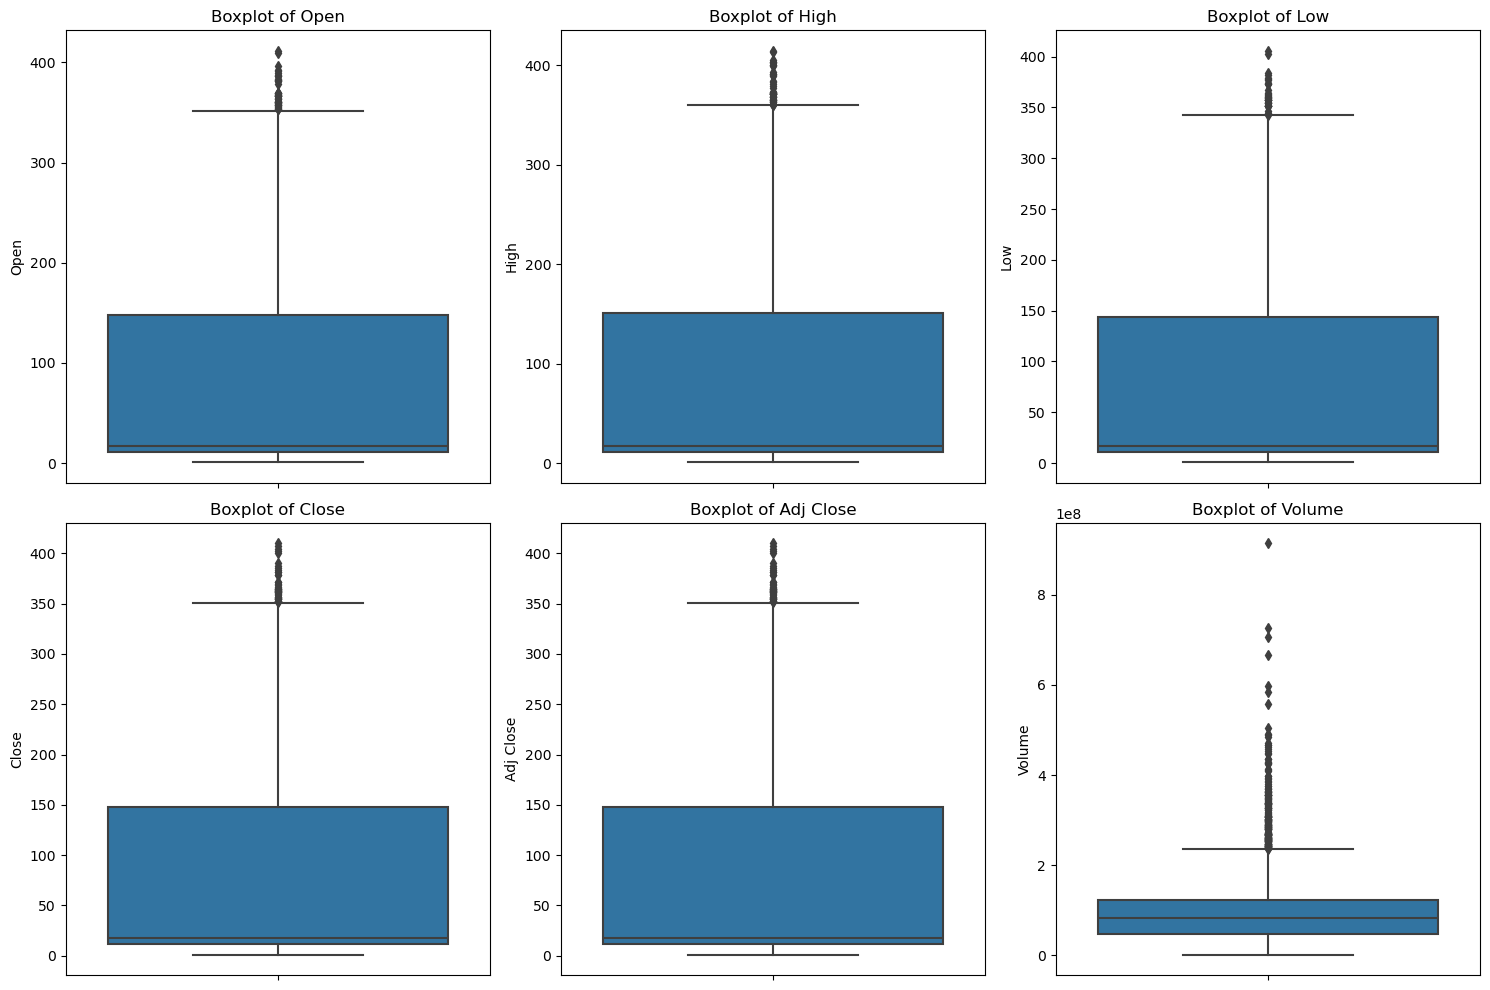

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the relevant columns
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tesla_data = Tesla[selected_columns]
# Create boxplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=tesla_data[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

The boxplots show the distribution of Tesla stock prices and trading volumes. Here's an analysis of each plot:

### Boxplot Analysis:

1. **Boxplot of Open**:
    - The opening prices are mostly concentrated between approximately 50 and 125.
    - There are several outliers above 300, indicating days when the stock opened at significantly higher prices.

2. **Boxplot of High**:
    - The high prices follow a similar pattern to the opening prices, with most values between 50 and 150.
    - Outliers are observed above 300, indicating days with exceptionally high stock prices.

3. **Boxplot of Low**:
    - The low prices are generally between 50 and 125, similar to the opening prices.
    - Outliers above 300 suggest some days had low prices that were relatively high compared to the rest of the dataset.

4. **Boxplot of Close**:
    - The closing prices are primarily between 50 and 125.
    - Outliers above 300 indicate days when the stock closed at much higher prices than usual.

5. **Boxplot of Adj Close**:
    - The adjusted closing prices follow the same pattern as the closing prices, being between 50 and 125.
    - Similar outliers are observed above 300.

6. **Boxplot of Volume**:
    - The trading volume is mostly concentrated between 0 and 2e7.
    - There are numerous outliers above 6e7, indicating days with exceptionally high trading volumes.

### Key Observations:

- **Central Tendency**: For most price metrics (Open, High, Low, Close, Adj Close), the central tendency is within the range of 50 to 125.
- **Outliers**: Significant outliers are present across all price metrics, especially above the 300 mark, suggesting some days with extremely high stock prices.
- **Volume**: The trading volume shows a high concentration at lower values, but there are many days with unusually high trading volumes, as indicated by the outliers.

### Conclusion:

- The boxplots reveal that while Tesla's stock prices generally stay within a certain range, there are instances of extreme price movements which could be due to market events or company-specific news.
- The trading volume data suggests that the stock is usually traded within a predictable range, but there are periods of significantly higher trading activity.
This analysis helps in understanding the distribution and volatility of Tesla's stock prices and trading volumes. Further investigation into the causes of the outliers could provide insights into what drives these extreme values.

In [17]:
# Check that high price is greater than or equal to low price
inconsistent_high_low = Tesla[Tesla['High'] < Tesla['Low']]
print(f"Number of inconsistent high-low price rows: {len(inconsistent_high_low)}")
# Check that closing prices are within the range of high and low prices
inconsistent_close = Tesla[(Tesla['Close'] < Tesla['Low']) | (Tesla['Close'] > Tesla['High'])]
print(f"Number of inconsistent close price rows: {len(inconsistent_close)}")

Number of inconsistent high-low price rows: 0
Number of inconsistent close price rows: 0


## 5. EDA

Next, we will performing Exploratory Data Analysis (EDA) to uncover patterns, trends, and relationships within the dataset, using:
- Univeriate analysis 
- Bivariate analysis

In [18]:
# # Univariate Analysis
# # Histograms
# plt.figure(figsize=(15, 10))
# columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# for i, column in enumerate(columns, 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(Tesla[column], bins=50, kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
# plt.tight_layout()
# plt.show()

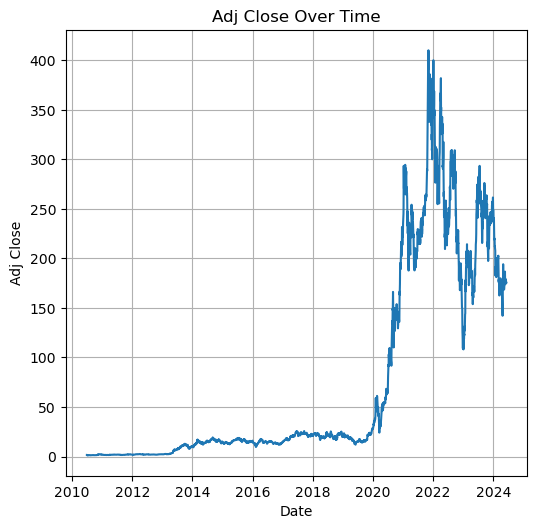

In [19]:
# Line Plots
#columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
columns = ['Adj Close']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.plot(Tesla.index, Tesla[column])
    plt.title(f'{column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
plt.tight_layout()
plt.show()

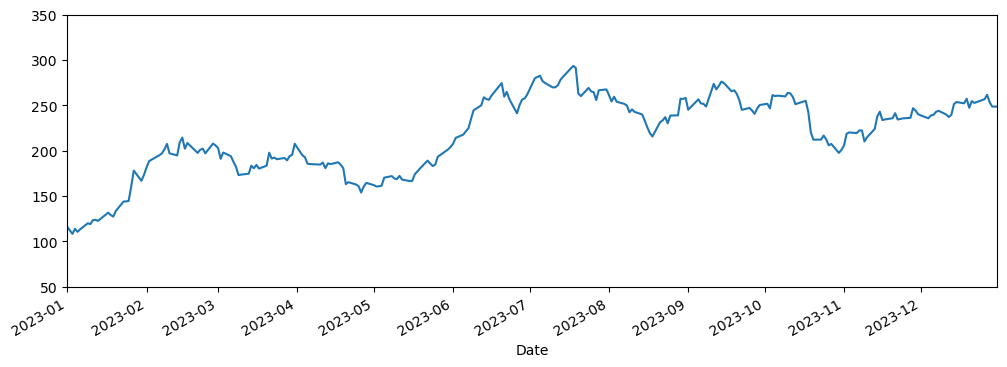

In [20]:
Tesla['Adj Close'].plot(figsize=(12,4), xlim=("2023-01-01", "2023-12-31"), ylim=(50,350));

Checking annual trend using Resample technique with rules

In [21]:
Tesla.resample(rule="A").mean()['Adj Close']

Date
2010-12-31      1.556123
2011-12-31      1.786984
2012-12-31      2.077907
2013-12-31      6.960082
2014-12-31     14.888606
2015-12-31     15.336193
2016-12-31     13.984484
2017-12-31     20.954420
2018-12-31     21.153995
2019-12-31     18.235347
2020-12-31     96.665689
2021-12-31    259.998162
2022-12-31    263.093081
2023-12-31    217.475240
2024-12-31    185.024312
Freq: A-DEC, Name: Adj Close, dtype: float64

In [22]:
Tesla.resample(rule="M").mean()['Adj Close']

Date
2010-06-30      1.590667
2010-07-31      1.303873
2010-08-31      1.300727
2010-09-30      1.382698
2010-10-31      1.380889
                 ...    
2024-02-29    192.793001
2024-03-31    176.163000
2024-04-30    165.872272
2024-05-31    177.231819
2024-06-30    175.375000
Freq: M, Name: Adj Close, Length: 169, dtype: float64

In [23]:
Tesla.resample(rule="W").mean()['Adj Close']

Date
2010-07-04      1.481334
2010-07-11      1.112833
2010-07-18      1.274133
2010-07-25      1.396267
2010-08-01      1.366800
                 ...    
2024-05-12    175.545999
2024-05-19    175.146002
2024-05-26    178.928003
2024-06-02    177.452499
2024-06-09    175.375000
Freq: W-SUN, Name: Adj Close, Length: 728, dtype: float64

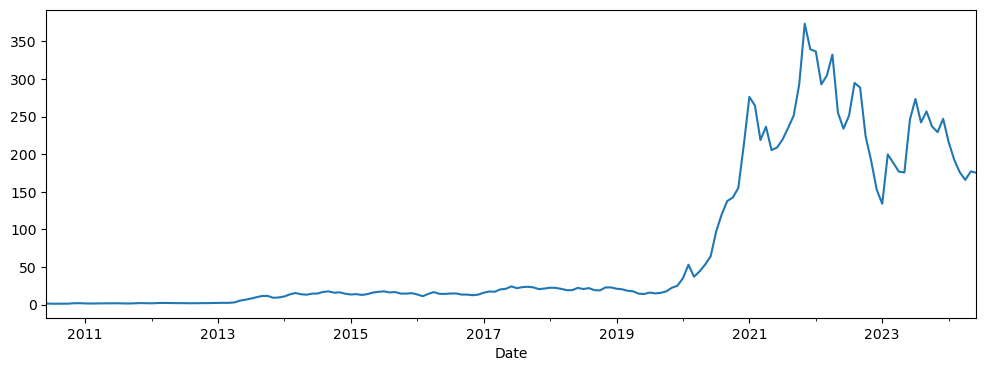

In [24]:
Tesla.resample(rule="M").mean()['Adj Close'].plot(figsize=(12,4));

Time Series Smoothening


In [40]:
Tesla["Adj Close_sma_10"]=Tesla["Adj Close"].rolling(window=10).mean()

In [41]:
Tesla.head(16)

,Open,High,Low,Close,Adj Close,Volume,High_sma_10,high_sma_5,Adj Close ewa 10,Adj Close_sma_10
Date,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,1.592667,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,1.590467,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,1.539628,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,1.454092,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,1.399867,1.344978,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN,1.292000,1.269228,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN,1.207067,1.243872,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN,1.146267,1.224791,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN,1.117600,1.205618,NaN


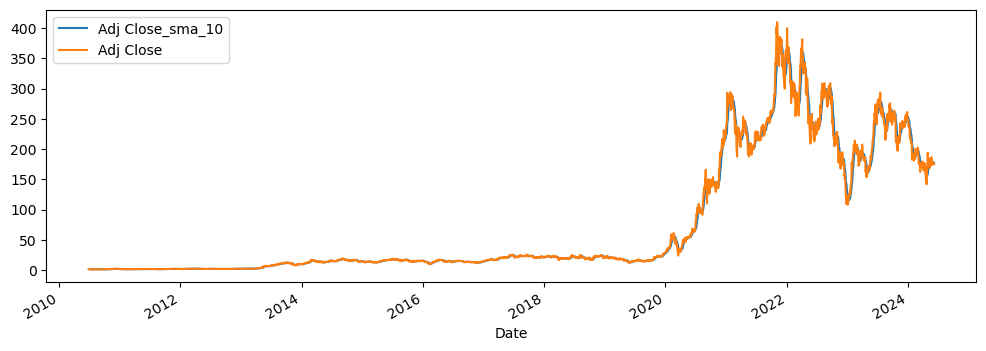

In [42]:
Tesla[["Adj Close_sma_10", "Adj Close"]].plot(figsize=(12, 4));

In [46]:
Tesla["Adj Closeh_sma_5"]= Tesla["Adj Close"].rolling(window=5).mean()

In [47]:
#Tesla[["Adj Close", "Adj Close 10", "high_sma_5"]].plot(figsize=(12,4))

2. Cummulative moving average(expanding)

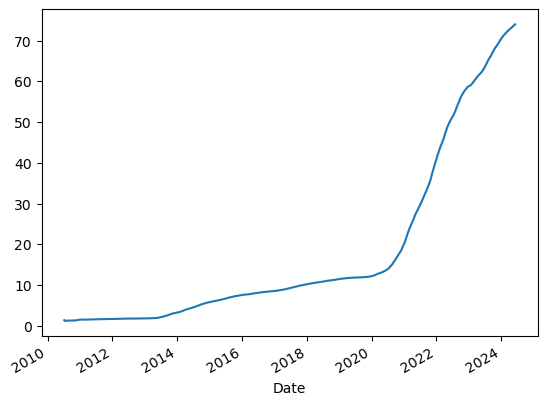

In [48]:
#CWA
Tesla['Adj Closeh_sma_5'].expanding().mean().plot();

3.Exponential Moving Average

In [49]:
#EMA
Tesla["Adj Close ewa 10"]=Tesla["Adj Close"].ewm(span=10).mean();

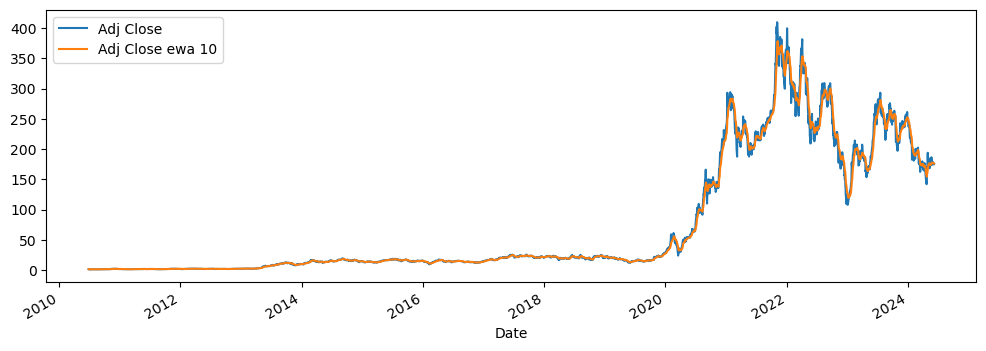

In [50]:
Tesla[["Adj Close", "Adj Close ewa 10"]].plot(figsize=(12,4));


C:\Users\Admin\anaconda5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

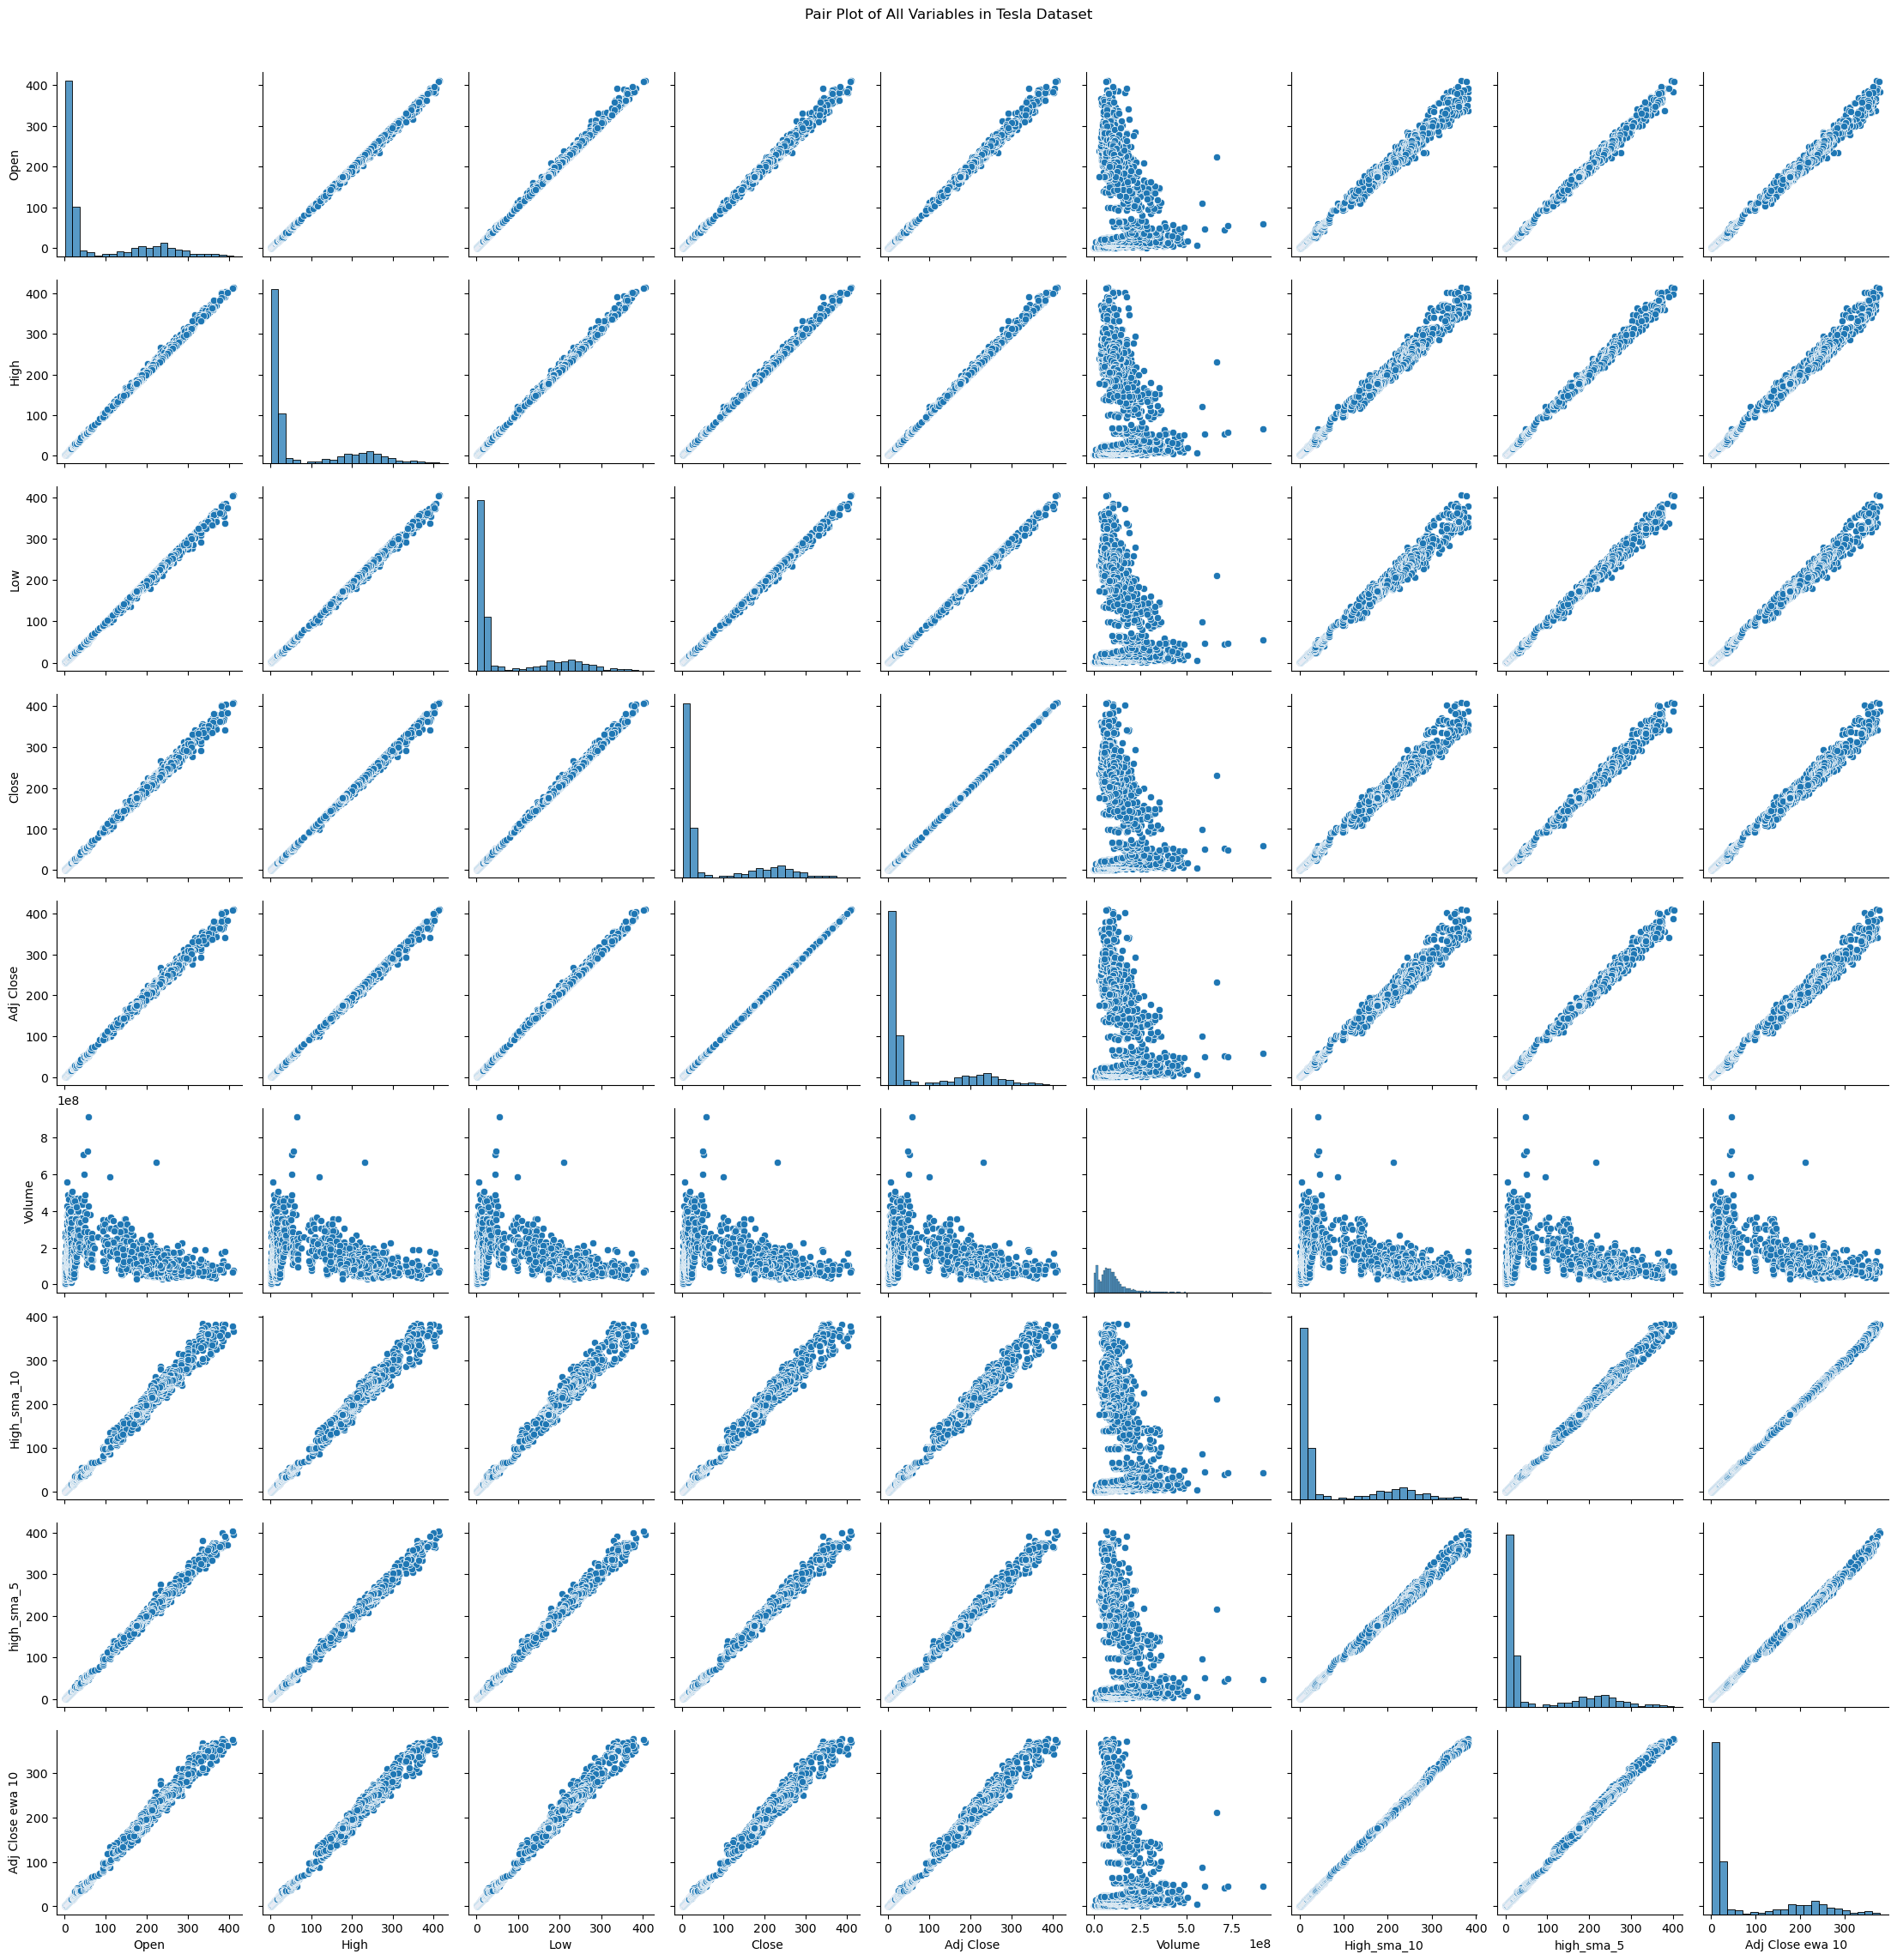

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
sns.pairplot(Tesla)
plt.suptitle('Pair Plot of All Variables in Tesla Dataset', y=1.02)
plt.show()

                      Open      High       Low     Close  Adj Close    Volume  \
Open              1.000000  0.999729  0.999629  0.999230   0.999230  0.102837   
High              0.999729  1.000000  0.999634  0.999655   0.999655  0.106400   
Low               0.999629  0.999634  1.000000  0.999689   0.999689  0.099579   
Close             0.999230  0.999655  0.999689  1.000000   1.000000  0.103767   
Adj Close         0.999230  0.999655  0.999689  1.000000   1.000000  0.103767   
Volume            0.102837  0.106400  0.099579  0.103767   0.103767  1.000000   
High_sma_10       0.997477  0.997398  0.997014  0.996918   0.996918  0.098438   
high_sma_5        0.999122  0.999082  0.998862  0.998755   0.998755  0.101679   
Adj Close ewa 10  0.998206  0.998178  0.997838  0.997767   0.997767  0.097984   

                  High_sma_10  high_sma_5  Adj Close ewa 10  
Open                 0.997477    0.999122          0.998206  
High                 0.997398    0.999082          0.998178  
Low

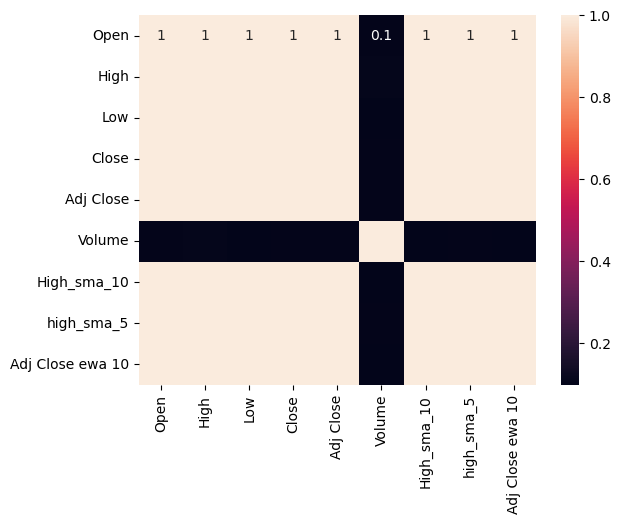

In [34]:
print(Tesla.corr())
#corelation analysis using a heat map
sns.heatmap(Tesla.corr(),annot=True);

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Standardizing the Data
scaler = StandardScaler()
tesla_scaled = scaler.fit_transform(Tesla)

In [36]:

# PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(tesla_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Plotting the 3D PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], principal_df['Principal Component 3'], alpha=0.7)
# Setting labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Tesla Dataset')

plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 6.Feature Engineering

In [ ]:
# 4. Kolmogorov-Smirnov Test
import scipy.stats as stats

stat, p = stats.kstest(Tesla[column], 'norm', args=(Tesla[column].mean(), Tesla[column].std()))
print(f'Kolmogorov-Smirnov Test for {column}')
print(f'Statistic: {stat}, p-value: {p}')
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
# # Normalize the features
from sklearn.preprocessing import MinMaxScaler

# # Exclude 'Date' column for scaling
# tesla_features = Tesla.drop(columns=['index'])
# tesla_date = Tesla['Date']  # Keep the Date column separate
# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# tesla_scaled = pd.DataFrame(scaler.fit_transform(tesla_features), columns=tesla_features.columns)

# # Add the Date column back to the scaled data
# tesla_scaled['index'] = tesla_date

# # Print the first 5 rows of the scaled dataset
# print(tesla_scaled.head())

# # Assuming 'Close' is the target variable
# target_variable = 'Close'
# print(f"The target variable is: {target_variable}")

In [ ]:
# Fit and transform the data (excluding the index)
tesla_scaled_values = scaler.fit_transform(Tesla)
tesla_scaled = pd.DataFrame(tesla_scaled_values, columns=Tesla.columns, index=Tesla.index)

# Print the first 5 rows of the scaled dataset
print(tesla_scaled.head())
# Assuming 'Close' is the target variable
target_variable = 'Close'
print(f"The target variable is: {target_variable}")

In [ ]:


# Plot histograms before and after normalization
plt.figure(figsize=(12, 6))
# Before normalization
plt.subplot(1, 2, 1)
plt.title('Before Normalization')
for feature in Tesla.columns:
    plt.hist(Tesla[feature], bins=20, alpha=0.5, label=feature)
plt.legend()
# After normalization
plt.subplot(1, 2, 2)
plt.title('After Normalization')
for feature in tesla_scaled.columns:
    plt.hist(tesla_scaled[feature], bins=20, alpha=0.5, label=feature)
plt.legend()

plt.tight_layout()
plt.show()
# Assuming 'Close' is the target variable
target_variable = 'Close'
print(f"The target variable is: {target_variable}")